In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [7]:
# Load the dataset
data = pd.read_csv('mall_customers.csv')
print(data.head())

   CustomerID  Gender  Age  Annual_Income_(k$)  Spending_Score
0           1    Male   19                  15              39
1           2    Male   21                  15              81
2           3  Female   20                  16               6
3           4  Female   23                  16              77
4           5  Female   31                  17              40


In [8]:
# Convert categorical features to numerical values
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [9]:
# Select the features for clustering
features = ['Age', 'Annual_Income_(k$)', 'Spending_Score']
X = data[features]

In [10]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

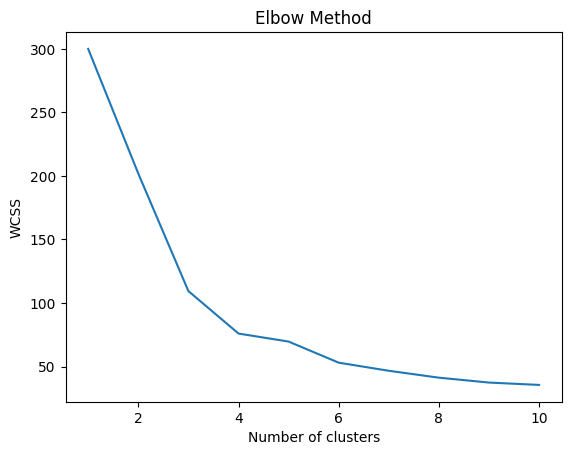

In [11]:
# Determine the optimal number of clusters using the elbow method
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method result
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

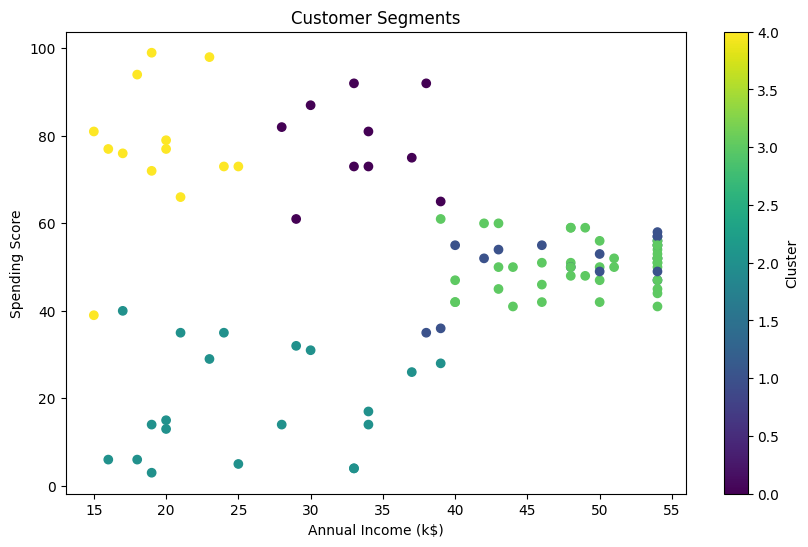

In [13]:
# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual_Income_(k$)'], data['Spending_Score'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('Customer Segments')
plt.colorbar(label='Cluster')
plt.show()